In [ ]:
import tensorflow as tf
from keras.src import layers
from keras.src.callbacks import EarlyStopping, ReduceLROnPlateau
import keras
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Preprocess data
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Reshape to (28, 28, 1) for CNN
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = keras.Sequential([
    layers.Input((28, 28, 1)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (5, 5), strides=2,activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (5, 5), strides=2,activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Conv2D(128, (4, 4), strides=2,activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

In [4]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    restore_best_weights=True
)

lr_schedule = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=2,
    min_lr=1e-5,
    verbose=1
)

history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.05,
    callbacks=[early_stop, lr_schedule],
    verbose=1
)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

Epoch 1/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 247s 547ms/step - accuracy: 0.8657 - loss: 0.4430 - val_accuracy: 0.0990 - val_loss: 19.7761 - learning_rate: 0.0010
Epoch 2/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 264s 552ms/step - accuracy: 0.9823 - loss: 0.0566 - val_accuracy: 0.9920 - val_loss: 0.0306 - learning_rate: 0.0010
Epoch 3/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 262s 551ms/step - accuracy: 0.9876 - loss: 0.0428 - val_accuracy: 0.9913 - val_loss: 0.0276 - learning_rate: 0.0010
Epoch 4/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 0.9903 - loss: 0.0298
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
446/446 ━━━━━━━━━━━━━━━━━━━━ 261s 549ms/step - accuracy: 0.9903 - loss: 0.0298 - val_accuracy: 0.9910 - val_loss: 0.0338 - learning_rate: 0.0010
Epoch 5/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 262s 550ms/step - accuracy: 0.9930 - loss: 0.0242 - val_accuracy: 0.9947 - val_loss: 0.0201 - learning_rate: 5.0000e-04
Epoch 6/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 266s 559ms/step - accu

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9934 - loss: 0.0181

Test accuracy: 0.9953


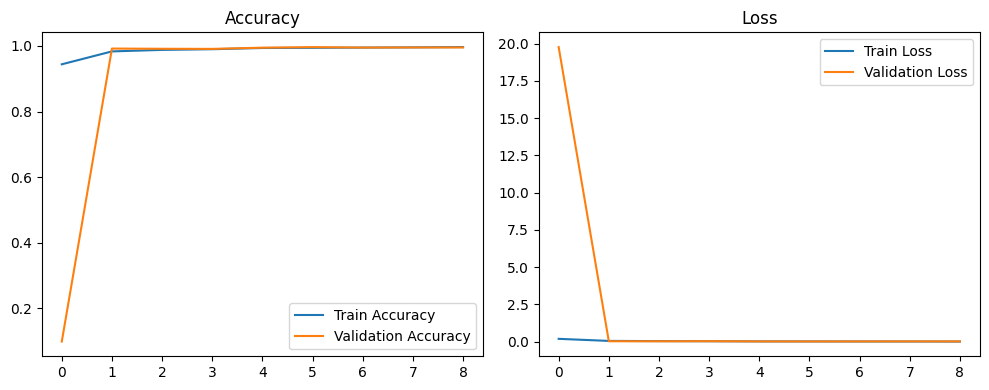

In [6]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()